In [1]:
from __future__ import print_function
import astropy
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#sys.path.pop(0)
%matplotlib inline

# First, lets make sure that barycorrpy is working

In [2]:
import barycorrpy
barycorrpy.__version__ #This tutorial assumes v0.4.4

'0.4.4'

In [3]:
# Running sample script - this should print:
# """
# ***********SUCCESS**************
# All barycentric correction velocities,  and time stamp conversions match expected values.
# """
from barycorrpy import sample_script 
results = sample_script.run_sample() 

Please join our Google Group to keep abreast of the latest versions and bug fixes - https://groups.google.com/g/barycorrpy
***********SUCCESS**************
All barycentric correction velocities,  and time stamp conversions match expected values.


# Import our package

In [4]:
import neidspec
neidspec

<module 'neidspec' from '/home/tehan/PycharmProjects/neidspec/neidspec/__init__.py'>

In [5]:
from astropy.io import fits
hdul = fits.open("../neidspec/data/neid/spectra/neidL2_20220429T075531.fits")
hdul[7].data[:, 0]

array([           nan,            nan,     0.        ,  3570.94358008,
        3591.94324722,  3613.47974528,  3635.09942364,  3656.83225318,
        3679.15724596,  3701.75987885,  3724.37136808,  3747.35858893,
        3770.57676958,  3794.19317193,  3818.06632553,  3842.23288517,
        3866.70902047,  3891.48650685,  3916.59840094,  3942.01700439,
        3967.80086961,  3993.9054221 ,  4020.36600416,  4047.16154653,
        4074.34983806,  4101.8714005 ,  4129.76974502,  4158.0616763 ,
        4186.73900431,  4215.8322097 ,  4245.29672114,  4275.21181569,
        4305.52243186,  4336.29113452,  4367.49412369,  4399.13929584,
        4431.2612608 ,  4463.84489962,  4496.9196697 ,  4530.48110042,
        4564.55084552,  4599.12539201,  4634.24625211,  4669.89768443,
        4706.1061791 ,  4742.87671401,  4780.22436962,  4818.16943618,
        4856.72194536,  4895.88953877,  4935.69820256,  4976.16649729,
        5017.30075531,  5059.10974336,  5101.63425231,  5144.86828328,
      

In [6]:
# Lets read in an HPF spectrum
# The function reads in the object name from the header
# If ccf_redshift is true, then it will redshift the wavelength to the stellar frame
# i.e., this takes out the absolute redshift estimated by calculating a CCF
N = neidspec.NEIDSpectrum("../neidspec/data/neid/spectra/neidL2_20220429T075531.fits",ccf_redshift=True)

[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5144.646302188119
[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5144.646302188119
[29.5    29.8125 30.125  30.4375 30.75   31.0625 31.375  31.6875 32.
 32.3125 32.625  32.9375 33.25   33.5625 33.875  34.1875 34.5    34.8125
 35.125  35.4375 35.75   36.0625 36.375  36.6875 37.     37.3125 37.625
 37.9375 38.25   38.5625 38.875  39.1875 39.5    39.8125 40.125  40.4375
 40.75   41.0625 41.375  41.6875 42.     42.3125 42.625  42.9375 43.25
 43.5625 43.875  44.1875 44.5    44.8125 45.125  45.4375 45.75   46.0625
 46.375  46.6875 47.     47.3125 47.625  47.9375 48.25   48.5625 48.875
 49.1875 49.5    49.8125 50.125  50.4375 50.75   51.0625 51.375  51.6875
 52.     52.3125 52.625  52.9375 53.25   53.5625 53.875  54.1875 54.5   ] [0.89786199 0.89919518 0.89855193 0.89827395 0.89841543 0.89720371
 0.89542527 0.89166556 0.88946388 0.88862039 0.88779746 0.8886340

/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:289: RuntimeWarning: divide by zero encountered in divide
  self.f_sky_debl = self.hdu[2].data[s:e] * self.exptime / hdu[2].data[s:e]
/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:289: RuntimeWarning: invalid value encountered in divide
  self.f_sky_debl = self.hdu[2].data[s:e] * self.exptime / hdu[2].data[s:e]
/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:294: RuntimeWarning: invalid value encountered in divide
  self.f_debl[i] = self.f_debl[i] / np.nanmedian(self.f_debl[i])


In [7]:
# Barycentric julian date of the observation
N.bjd

2459698.8437183117

In [8]:
print(N) # The SNR is for HPF order 18 (~1micron)

NEIDSpec(TIC 467179528,sn55=4.6)


### This creates a 'Target' class instance within our object

- The config file for the object is by default saved to "../data/target_files/"
- If that file already exist, then it is read in from disk. If it does not exist, it queries Simbad and creates the file
- This way you can change the values within the file if it is already created

In [9]:
# This is used 
N.target

TIC 467179528, ra=197.9982, dec=65.8338, pmra=-150.652, pmdec=-25.3682, rv=0.0000, px=27.7397, epoch=2451545.0

In [10]:
N.target.ra, N.target.dec

(197.998167681085, 65.8338065266292)

In [11]:
# We can use this to calculate the barycentric velocity in km/s
t = astropy.time.Time("2019-10-08 00:00:00.0",format="iso").jd
N.target.calc_barycentric_velocity(t,obs='McDonald Observatory')

(2458764.4989878866, 9.981222311660272)

In [12]:
# The barycentric velocity is automatically stored in an attribute
N.berv # km/s

-12.934880604337353

In [13]:
np.shape(N.f_debl)

(94, 9216)

## Lets plot the spectrum 

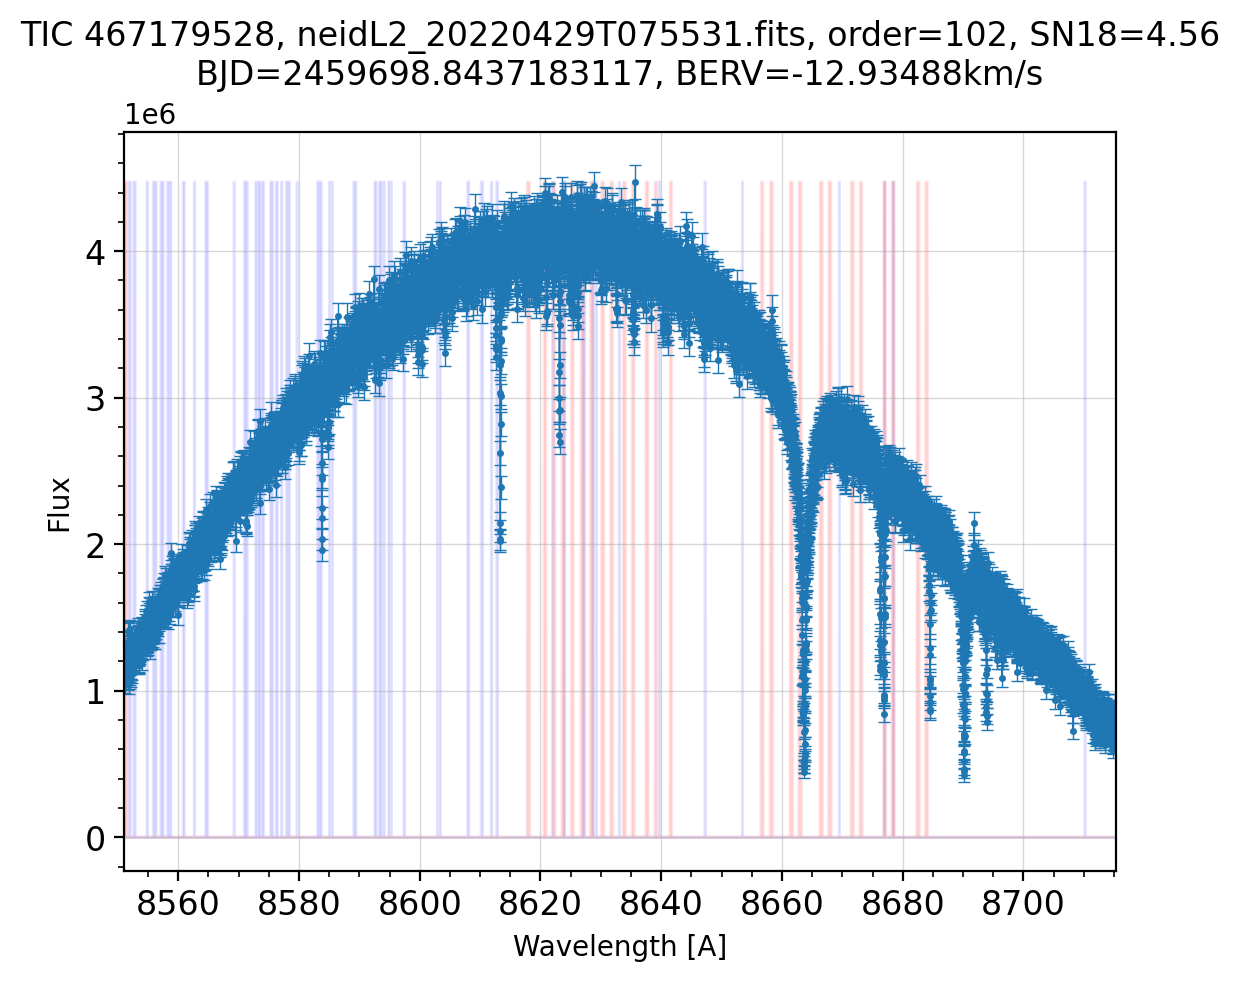

In [14]:
N.plot_order(102,deblazed=False)

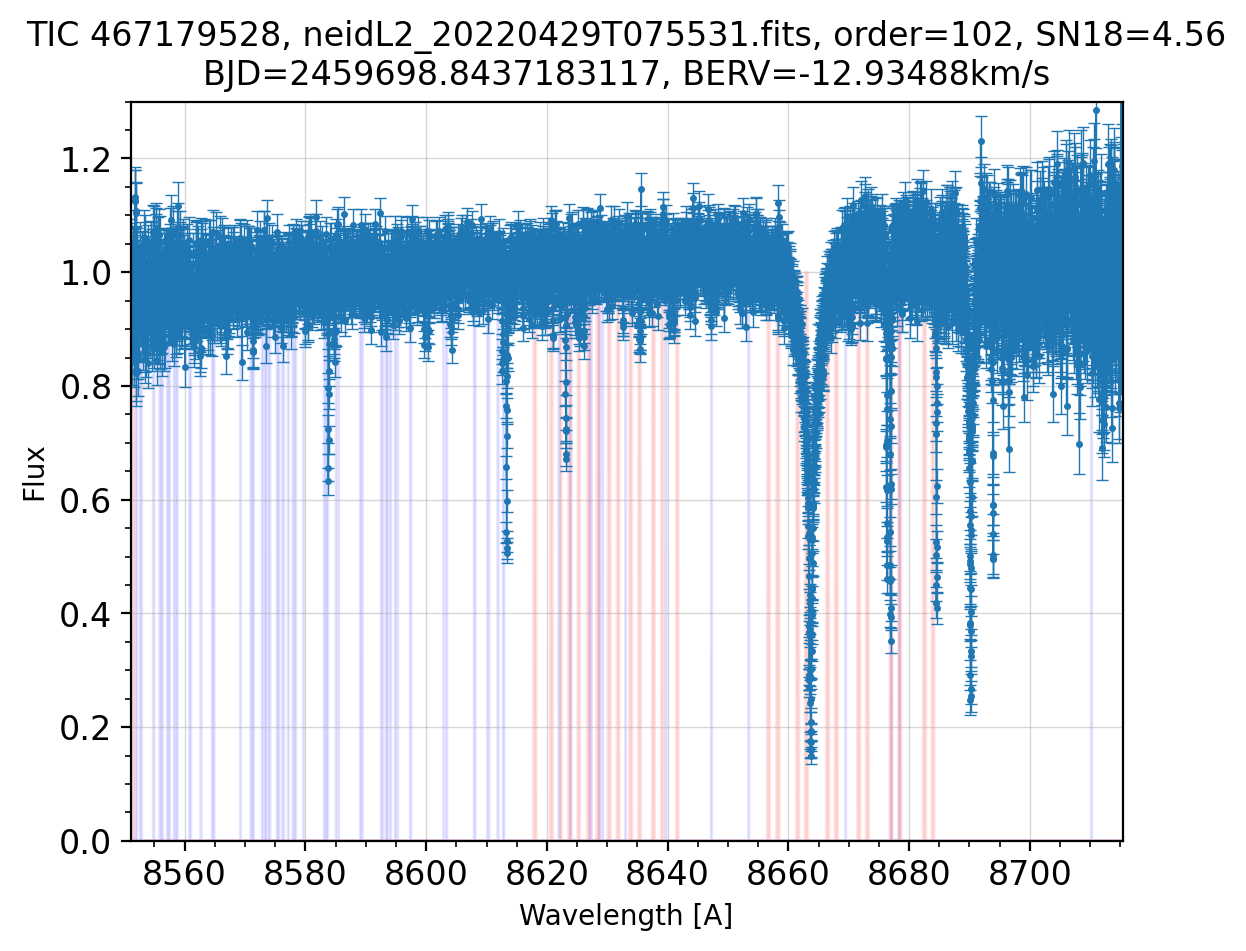

In [15]:
N.plot_order(102,deblazed=True)

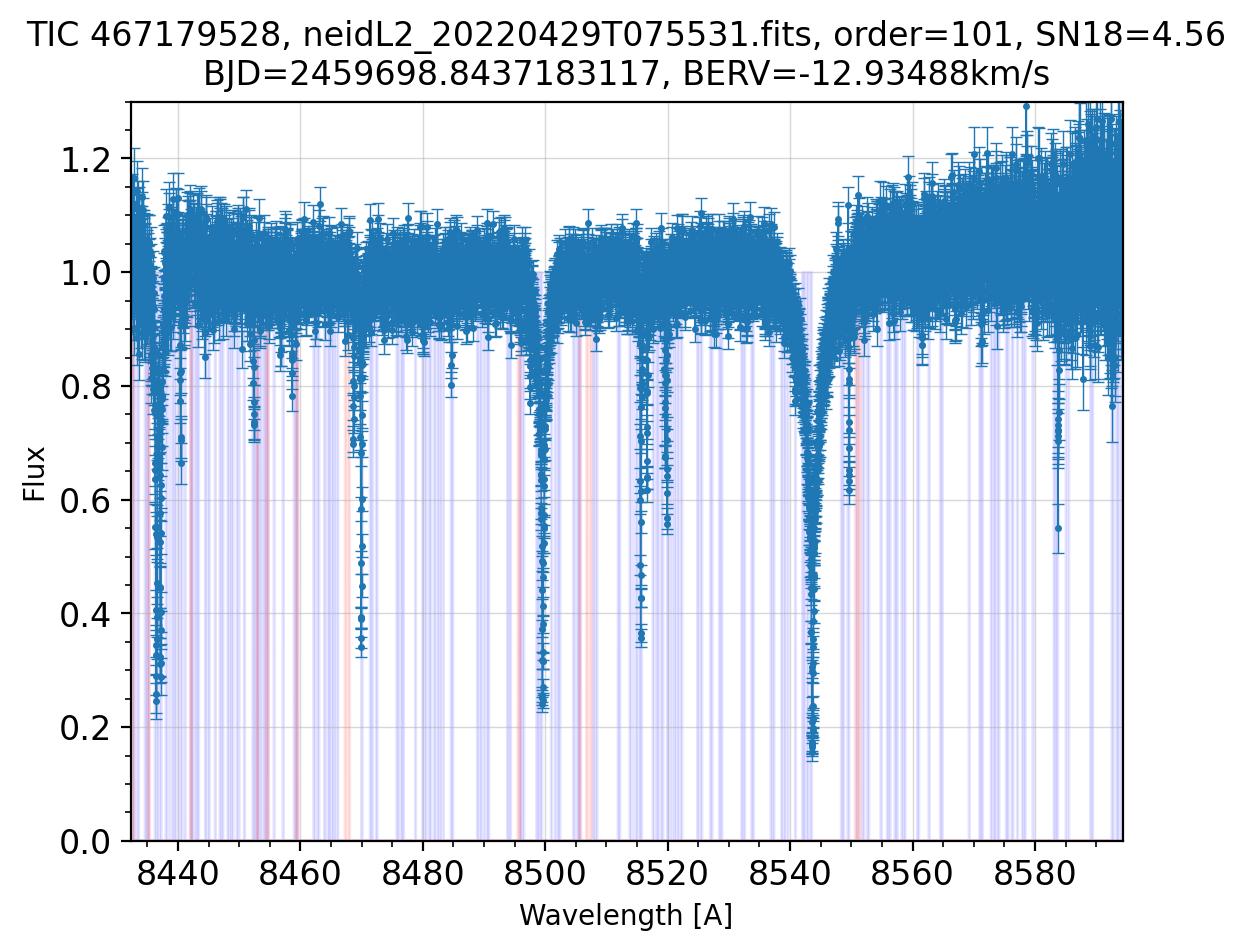

In [16]:
N.plot_order(101,deblazed=True)

Text(0.5, 1.0, 'Deblazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)')

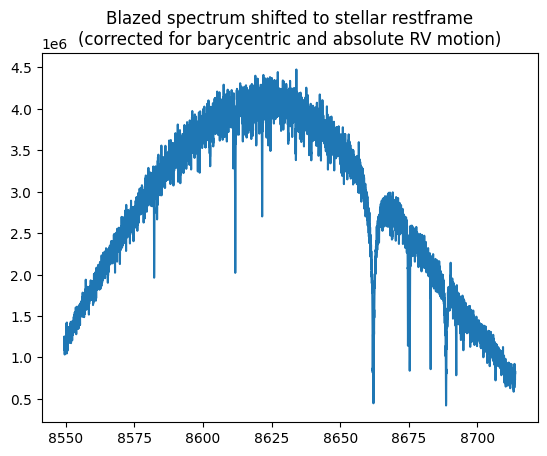

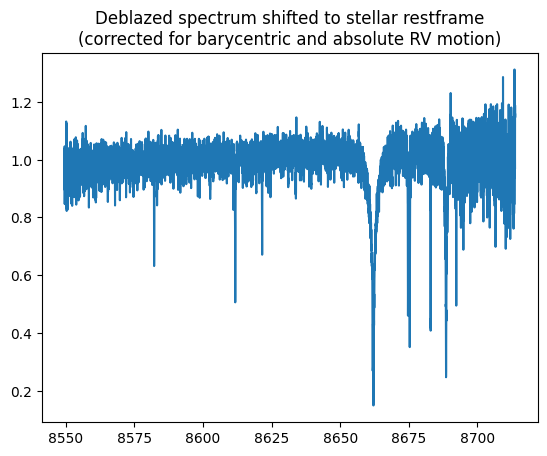

In [17]:
#We could also this the following way using the handy wavelength and flux attributes
o = 102
o -= 10

# Blazed
fig, ax = plt.subplots()
ax.plot(N.w_shifted[o],N.f[o])
ax.set_title("Blazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)")

# Deblazed
fig, ax = plt.subplots()
ax.plot(N.w_shifted[o],N.f_debl[o])
ax.set_title("Deblazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)")


In [18]:
# Other attributes are:
print(N.w_shifted.shape) # shifted wavelength
print(N.w.shape)         # non-shifted original wavelength
print(N.f.shape)         # non-deblazed science flux (sky-subtracted)
print(N.f_debl.shape)    # deblazed science flux (sky-subtracted)
print(N.f_sci.shape)     # Science flux (not sky-subtracted)
print(N.e.shape)         # error for deblazed sky-subtracted science flux
print(N.object)          # Object
print(N.bjd)             # BJD_TDB midpoint
print(N.sn55)            # SNR for order 55
print(N.berv)            # barycentric correction in km/s

(94, 9216)
(94, 9216)
(94, 9216)
(94, 9216)
(94, 9216)
(94, 9216)
TIC 467179528
2459698.8437183117
4.5615367594457155
-12.934880604337353


# CCFs

[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5144.646302188119
[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5188.625408000298
[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
8550.667660340116
unexpected array size: new_size=1, got array with arr_size=0


/home/tehan/PycharmProjects/neidspec/crosscorr/crosscorr/crosscorr.py:175: RuntimeWarning: invalid value encountered in divide
  ax.plot(v, ccf_array[o] / np.nanmax(ccf_array[o]), label="o={}".format(o + 10))


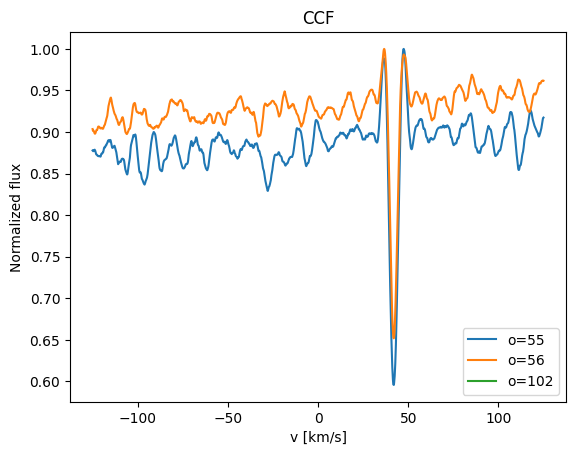

In [19]:
# Lets calculate fast ccfs for well-behaved orders using the crosscorr package
v = np.linspace(-125.,125.,1501)
orders = [55,56,102]
ccf = N.calculate_ccf_for_orders(v,orders=orders,plot=True)

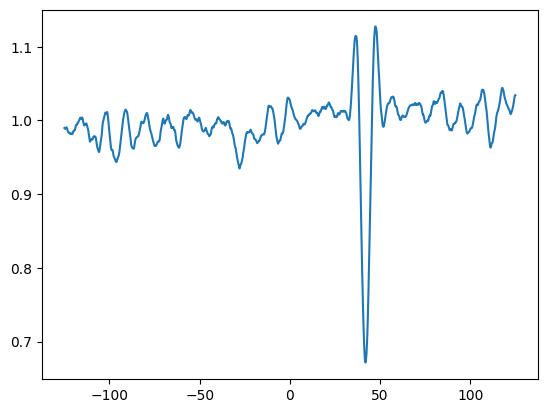

In [20]:
fig, ax = plt.subplots()
o = 55
ax.plot(v,ccf[o - 10]/np.nanmedian(ccf[o - 10]))

[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5144.646302188119
[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5188.625408000298
[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
8550.667660340116
unexpected array size: new_size=1, got array with arr_size=0


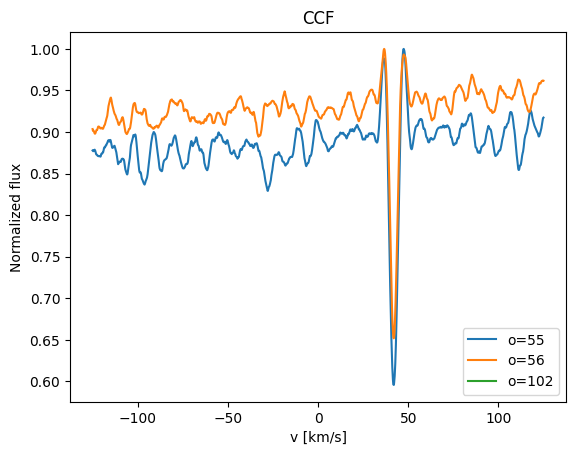

In [21]:
# Lets calculate fast ccfs for well-behaved orders using the crosscorr package
v = np.linspace(-125., 125., 1501)
orders = [55, 56, 102]
ccf = N.calculate_ccf_for_orders(v, orders=orders, plot=True)# Calculates on barycentric shifted (not abs RV shifted) and undeblazed version
# rv1 is just the argmin of the CCF, the rv2 is an actual Gaussian fit minimum to the CCF valley
# You can see that order 18 is pretty wonky -- likely tellurics
# orders = [55,56]
# rv1, rv2 = N.rvabs_for_orders(v,orders,plot=True,verbose=True)

[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5144.646302188119
[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5188.625408000298
[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5233.3607521768345
[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
7684.711590156956
[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
7783.241117886035


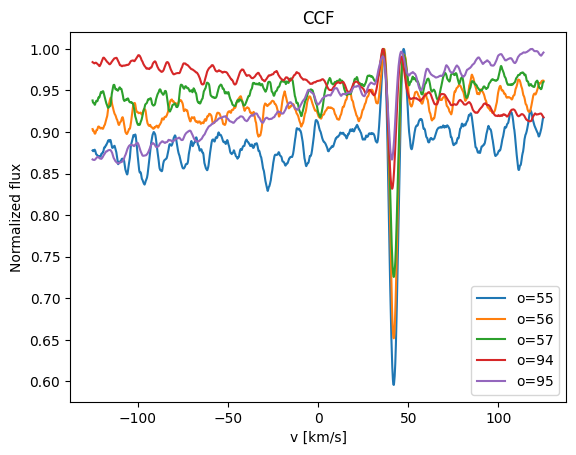

In [22]:
# Lets calculate fast ccfs for well-behaved orders using the crosscorr package
v = np.linspace(-125.,125.,1501)
orders = [55,56,57,94,95,]
ccf = N.calculate_ccf_for_orders(v,orders=orders,plot=True)

# Working with a collection of spectra

In [23]:
import glob

In [30]:
files = glob.glob("../neidspec/data/neid/spectra/*.fits")
HS = neidspec.NEIDSpecList(filelist=files)

[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5144.68681838977
[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5144.68681838977
[29.5    29.8125 30.125  30.4375 30.75   31.0625 31.375  31.6875 32.
 32.3125 32.625  32.9375 33.25   33.5625 33.875  34.1875 34.5    34.8125
 35.125  35.4375 35.75   36.0625 36.375  36.6875 37.     37.3125 37.625
 37.9375 38.25   38.5625 38.875  39.1875 39.5    39.8125 40.125  40.4375
 40.75   41.0625 41.375  41.6875 42.     42.3125 42.625  42.9375 43.25
 43.5625 43.875  44.1875 44.5    44.8125 45.125  45.4375 45.75   46.0625
 46.375  46.6875 47.     47.3125 47.625  47.9375 48.25   48.5625 48.875
 49.1875 49.5    49.8125 50.125  50.4375 50.75   51.0625 51.375  51.6875
 52.     52.3125 52.625  52.9375 53.25   53.5625 53.875  54.1875 54.5   ] [0.90163602 0.90123028 0.89903782 0.89559364 0.89034136 0.8855021
 0.88247772 0.87972445 0.87953375 0.87944599 0.88082326 0.88424838
 

/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:289: RuntimeWarning: divide by zero encountered in divide
  self.f_sky_debl = self.hdu[2].data[s:e] * self.exptime / hdu[2].data[s:e]
/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:289: RuntimeWarning: invalid value encountered in divide
  self.f_sky_debl = self.hdu[2].data[s:e] * self.exptime / hdu[2].data[s:e]
/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:294: RuntimeWarning: invalid value encountered in divide
  self.f_debl[i] = self.f_debl[i] / np.nanmedian(self.f_debl[i])


[3979.50162807 3982.46641528 3995.29078647 ... 7858.73561073 7859.18711006
 7859.9603829 ]
5188.374833682014
[ 90.83333333  91.14583333  91.45833333  91.77083333  92.08333333
  92.39583333  92.70833333  93.02083333  93.33333333  93.64583333
  93.95833333  94.27083333  94.58333333  94.89583333  95.20833333
  95.52083333  95.83333333  96.14583333  96.45833333  96.77083333
  97.08333333  97.39583333  97.70833333  98.02083333  98.33333333
  98.64583333  98.95833333  99.27083333  99.58333333  99.89583333
 100.20833333 100.52083333 100.83333333 101.14583333 101.45833333
 101.77083333 102.08333333 102.39583333 102.70833333 103.02083333
 103.33333333 103.64583333 103.95833333 104.27083333 104.58333333
 104.89583333 105.20833333 105.52083333 105.83333333 106.14583333
 106.45833333 106.77083333 107.08333333 107.39583333 107.70833333
 108.02083333 108.33333333 108.64583333 108.95833333 109.27083333
 109.58333333 109.89583333 110.20833333 110.52083333 110.83333333
 111.14583333 111.45833333 111.77

In [31]:
HS.df

,OBJECT_ID,filename,exptime,sn55,qprog,rv
0,TIC 467179528,../neidspec/data/neid/spectra/neidL2_20220410T...,1735.907448,5.323909,2022A-605913,41.984840
1,TIC 450298091,../neidspec/data/neid/spectra/neidL2_20220419T...,899.801179,19.712883,2022A-452266,103.338213
2,TIC 467179528,../neidspec/data/neid/spectra/neidL2_20220429T...,1799.971912,4.561537,2022A-605913,41.974127


In [32]:
HS.sn55

[5.323909479199122, 19.71288324853069, 4.5615367594457155]

In [ ]:
HS.objects

In [ ]:
N